In [168]:
# project mercedes machine learning

# Actions to perform
#  * If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
#  * Check for null and unique values for test and train sets.
#  * Apply label encoder.
#  * Perform dimensionality reduction.
#  * Predict your test_df values using XGBoost.


# Import necessary libraries
!pip install nbconvert
!pip install --upgrade pip
## for printing to .pdf
!pip install pylatex
!pip install seaborn
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
# warnings.filterwarnings('ignore')

df_train = pd.read_csv("mer_train 2.csv")
df_train = df_train.replace(r'^\s*$', np.nan, regex=True)

# dataframe for testing against, what is the prediction column
df_test = pd.read_csv("mer_test.csv")
df_test = df_test.replace(r'^\s*$', np.nan, regex=True)


In [169]:
df_train = DataFrame(df_train)
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


(4209, 378)

In [170]:
df_test = DataFrame(df_test)
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


(4209, 377)

In [171]:
## Mixture of 370 numerical columns (float64 + int64) and only 8 categorical (object) or string values
df_train.sample(6)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1073,2140,97.94,al,o,ai,f,d,ag,j,l,...,0,0,0,0,0,0,0,0,0,0
144,310,96.41,f,l,ae,f,d,i,i,w,...,0,0,0,0,0,0,0,0,0,0
2380,4779,105.83,j,aa,ay,c,d,n,l,o,...,1,0,0,0,0,0,0,0,0,0
184,385,79.09,az,y,b,c,d,i,j,l,...,0,0,0,0,0,0,1,0,0,0
2587,5180,108.69,ak,v,ak,d,d,m,i,r,...,0,0,0,0,0,0,0,0,0,0
2768,5534,94.60,z,b,m,a,d,p,j,j,...,0,0,1,0,0,0,0,0,0,0


In [172]:
df_test.sample(6)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2683,5370,am,i,ae,c,d,m,j,h,0,...,0,0,1,0,0,0,0,0,0,0
1090,2203,ak,v,as,c,d,ab,j,q,0,...,1,0,0,0,0,0,0,0,0,0
2256,4503,ak,l,as,f,d,k,i,o,0,...,0,0,0,0,0,0,0,0,0,0
4144,8289,x,i,as,a,d,aa,j,a,0,...,0,0,1,0,0,0,0,0,0,0
3475,6966,y,b,f,c,d,r,h,j,0,...,0,0,1,0,0,0,0,0,0,0
2954,5896,m,l,as,f,d,p,a,e,0,...,1,0,0,0,0,0,0,0,0,0


In [173]:
df_train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [174]:
# if time is seconds, mean is centered around 100 sec
# Missing values
df_train.isnull().mean().sort_values(ascending=False)

ID      0.0
X254    0.0
X263    0.0
X262    0.0
X261    0.0
       ... 
X127    0.0
X126    0.0
X125    0.0
X124    0.0
X385    0.0
Length: 378, dtype: float64

In [175]:
df_test.isnull().mean().sort_values(ascending=False)

ID      0.0
X255    0.0
X264    0.0
X263    0.0
X262    0.0
       ... 
X128    0.0
X127    0.0
X126    0.0
X125    0.0
X385    0.0
Length: 377, dtype: float64

In [176]:
# no null or empty columns
# Size, variables and dtypes
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 13.8 MB


In [177]:
df_train.select_dtypes(include = ['object'], exclude = ['int64'])

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [178]:
# Missing values
df_train.isnull().mean().sort_values(ascending=False)

ID      0.0
X254    0.0
X263    0.0
X262    0.0
X261    0.0
       ... 
X127    0.0
X126    0.0
X125    0.0
X124    0.0
X385    0.0
Length: 378, dtype: float64

In [179]:
# Cardinality
# Rare values (for categorical ONLY)
df_train.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 378, dtype: int64

In [180]:
NAs = pd.concat([df_train.isnull().sum()], axis=1, keys=['Count of NANs'])
NAs.sample(6)

,Count of NANs
X321,0
X162,0
X233,0
X56,0
X85,0
X292,0


In [181]:
NAs[NAs.sum(axis=1) > 0]

#There are no Not A Numbers, meaning there are no null (missing) values 



,Count of NANs


In [182]:
## columns X0, X1, X2, X3, 'X4', 'X5', 'X6', 'X8' samples are strings
# categorical
df_train.describe(include='O')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [183]:
## ID column too unique, could be removed, lots of binary columns and need more
## investigation of columns y (2545 unique) and X0 (47 unique)
# Distributions, scale, and outliers
df_train.describe()
# For distributions, look for differences in mean vs std vs percentiles
# For scale, look for different orders of magnitud between variables' min/max



,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
# Distributions only (for outliers, values further away from zero indicate more extreme outliers) 
df_train.skew(numeric_only=True)

ID       0.001687
y        1.206526
X10      8.498569
X11      0.000000
X12      3.226176
          ...    
X380    10.994927
X382    11.341542
X383    24.468635
X384    45.858470
X385    26.438601
Length: 370, dtype: float64

In [185]:
# Distributions only (for outliers, values further away from zero indicate more extreme outliers) 
df_train.skew( numeric_only=True).sort_values(ascending=False)


X257    64.876806
X339    64.876806
X210    64.876806
X207    64.876806
X39     64.876806
          ...    
X229    -4.702223
X361    -5.146612
X111    -6.062968
X74    -37.429924
X205   -64.876806
Length: 370, dtype: float64

In [186]:
# Correlations
df_train.corr(numeric_only=True)

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,1.000000,-0.055108,0.001602,NaN,0.058988,-0.031917,-0.025438,0.002237,-0.036480,-0.038171,...,0.045229,-0.080259,-0.022965,0.030371,0.023382,-0.013577,-0.038171,-0.009332,-0.015355,0.029059
y,-0.055108,1.000000,-0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X10,0.001602,-0.026985,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.058988,0.089792,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,-0.013577,0.040932,-0.010479,NaN,-0.005566,0.023045,0.007743,-0.001968,-0.004619,-0.007899,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.038171,-0.159815,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,-0.009332,0.040291,-0.004740,NaN,-0.011628,-0.010125,0.023604,-0.000890,-0.002089,-0.003572,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,-0.015355,-0.004591,-0.002532,NaN,-0.006212,0.041242,0.025199,-0.000475,-0.001116,-0.001908,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


In [187]:
df_test.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 13.7 MB


In [188]:
df_test.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [189]:
# Rare values (for categorical ONLY)
df_test.nunique()

ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64

In [190]:
## Size, variables and dtypes
df_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 13.7 MB


In [191]:
# Missing values
df_test.isnull().mean().sort_values(ascending=False)

ID      0.0
X255    0.0
X264    0.0
X263    0.0
X262    0.0
       ... 
X128    0.0
X127    0.0
X126    0.0
X125    0.0
X385    0.0
Length: 377, dtype: float64

In [192]:
# Null hypothesis per ANOVA / Categorical relationships with y

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('y ~ C(X4)', data=df_train).fit()
print('F-statistic : ', model.fvalue)
print('p-value :', model.f_pvalue)

anova_table = sm.stats.anova_lm(model, type=2)
anova_table
#X4 is barely statistically significant.


F-statistic :  2.6188965213725144
p-value : 0.04920919630464415


,df,sum_sq,mean_sq,F,PR(>F)
C(X4),3.0,1261.638003,420.546001,2.618897,0.049209
Residual,4205.0,675244.676340,160.581374,NaN,NaN


In [193]:
#Perform multiple pairwise comparison (Tukey HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
colname='X4'
m_comp = pairwise_tukeyhsd(endog=df_train['y'], groups=df_train[colname], alpha=0.05)
print(m_comp)

#H0 is the means for a pair of gropus (say a and b) are the same
#The reject column states False - We cannot reject the null hypothesis
#But for pairs (c&d) we can reject the H0 - mean of c and mean of d are different



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b     11.7  0.875 -28.1875 51.5875  False
     a      c    32.94 0.1461  -6.9475 72.8275  False
     a      d  -0.4417    1.0 -23.4762 22.5928  False
     b      c    21.24 0.6363 -24.8181 67.2981  False
     b      d -12.1417 0.7733 -44.7136 20.4301  False
     c      d -33.3817 0.0421 -65.9536 -0.8099   True
-----------------------------------------------------


In [194]:
## separate y column and others 

# X = df_train.iloc[:, 3:]
# X = df_train.drop(columns=['X11','y','ID'])

# y = df_train.iloc[:,0:2]
## above includes 'ID' column, should we drop?

## Resolution? What do we do with columns with lot's of range or extreme values
## heatmap for visualization for categorical but need to find most correlated values
## sns.heatmap(X.corr(method='spearman', numeric_only=True), annot=True)

In [195]:
%%time
# Looking for columns with low variation

cols_to_drop3_var0 = []

for each_col in df_train.drop(['y'], axis=1).columns:
    
    if df_train[each_col].dtypes != 'O':     # not an object col
        if df_train[each_col].std() == 0.00:
            # print('Column : {} has std dev of {}'.format(each_col, rna_merged[each_col].std()))

            stats = each_col + ' { '\
                    ' std : ' + str(df_train[each_col].std()) + \
                    ' Min : ' + str(df_train[each_col].min()) + \
                    ' Max : ' + str(df_train[each_col].min()) + " }  " 

            print(stats)              

            cols_to_drop3_var0.append(each_col)

print('number of features with 0 std : {}'.format(len(cols_to_drop3_var0)))



X11 {  std : 0.0 Min : 0 Max : 0 }  
X93 {  std : 0.0 Min : 0 Max : 0 }  
X107 {  std : 0.0 Min : 0 Max : 0 }  
X233 {  std : 0.0 Min : 0 Max : 0 }  
X235 {  std : 0.0 Min : 0 Max : 0 }  
X268 {  std : 0.0 Min : 0 Max : 0 }  
X289 {  std : 0.0 Min : 0 Max : 0 }  
X290 {  std : 0.0 Min : 0 Max : 0 }  
X293 {  std : 0.0 Min : 0 Max : 0 }  
X297 {  std : 0.0 Min : 0 Max : 0 }  
X330 {  std : 0.0 Min : 0 Max : 0 }  
X347 {  std : 0.0 Min : 0 Max : 0 }  
number of features with 0 std : 12
CPU times: user 65 ms, sys: 5.67 ms, total: 70.7 ms
Wall time: 71.7 ms


In [196]:
cols_to_drop3_var0

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [197]:
# Types of columns and meaning


dtype_df = df_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.head(6)

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object


In [198]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()
#369 integer columns and so on


,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [199]:
# possible data types in pandas
numerics= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']   # numeric
objects = ['O'] 
# object - string - categorical
df_train_num = df_train.select_dtypes(include=numerics)
df_train_cat = df_train.select_dtypes(include=objects)

print(df_train_cat.columns)
print(df_train_num.columns)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


In [200]:
# what can we understand about categoricals
# for each cat column, display the distinct values
for col_name in df_train_cat.columns:
    
    print('The unique values in '+col_name+' are: ', df_train_cat[col_name].nunique())
    
    print(df_train_cat[col_name].unique())
    #X0 has 47 different values, and so on...

The unique values in X0 are:  47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
The unique values in X1 are:  27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
The unique values in X2 are:  44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
The unique values in X3 are:  7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
The unique values in X4 are:  4
['d' 'b' 'c' 'a']
The unique values in X5 are:  29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
The unique values in X6 are:  12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
The unique values 

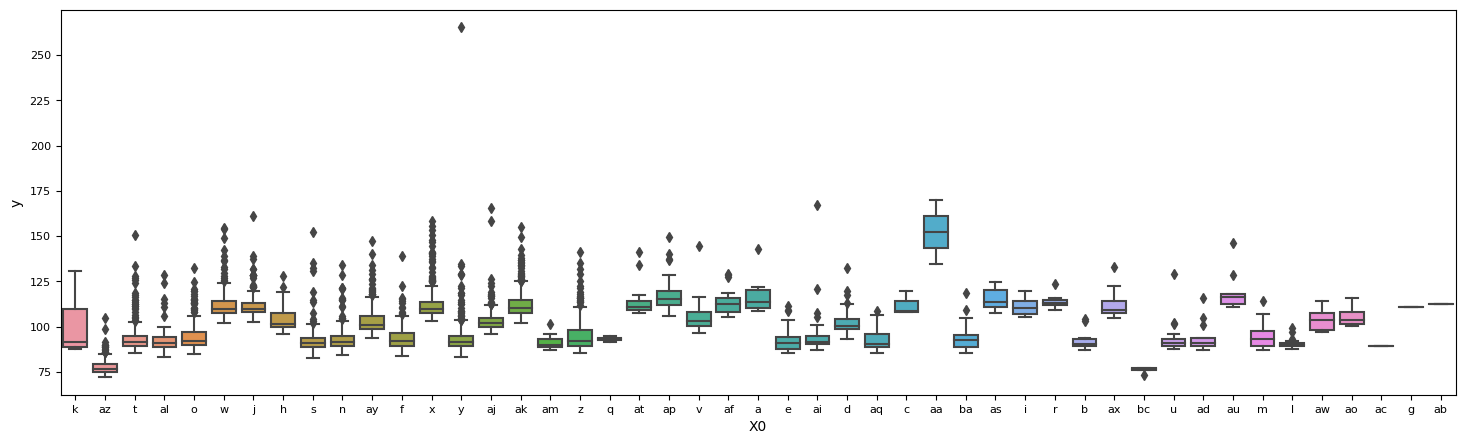

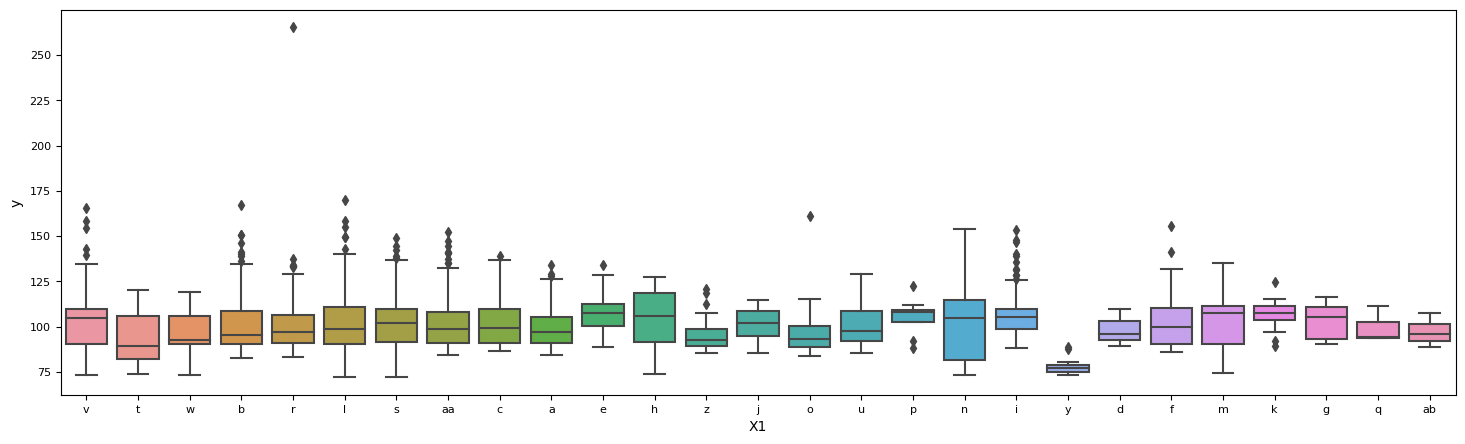

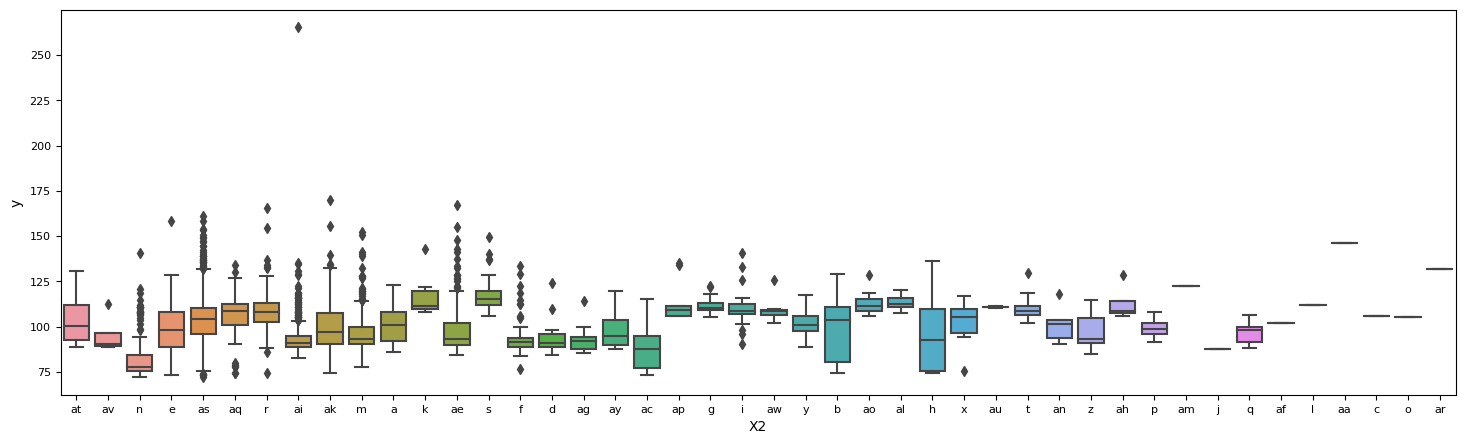

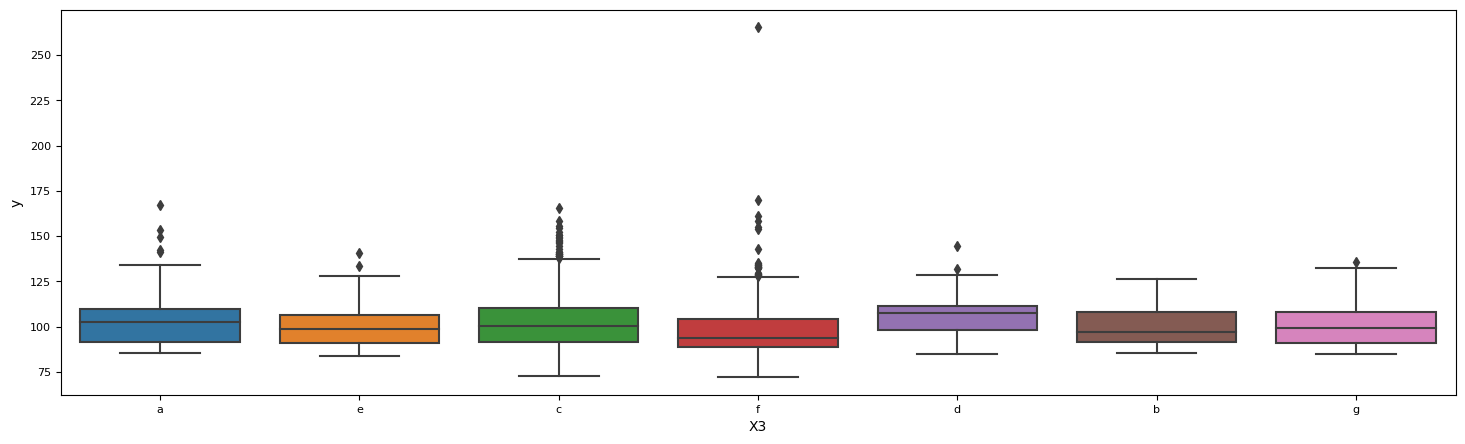

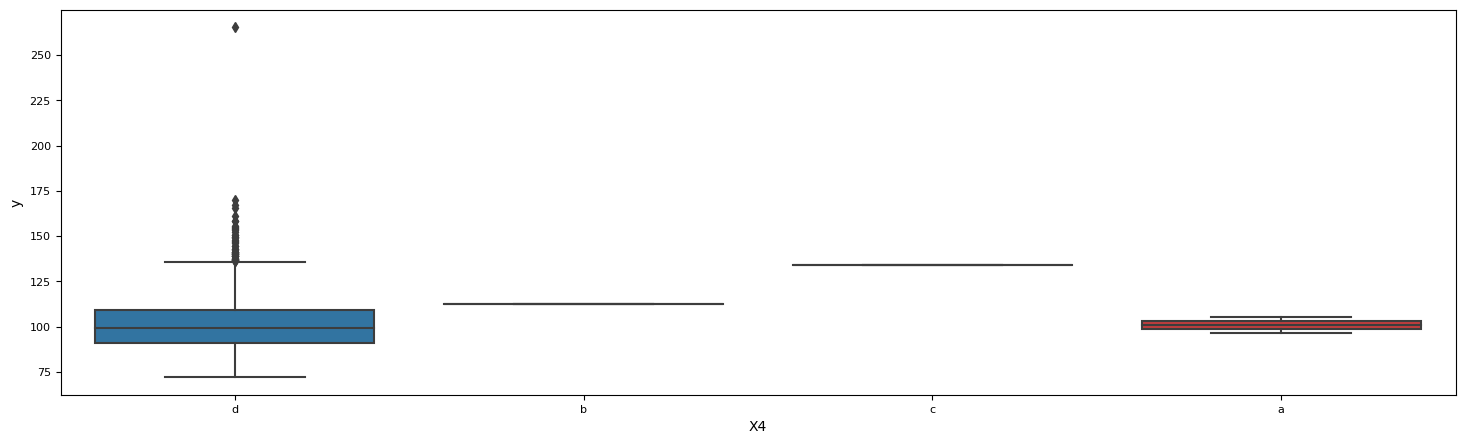

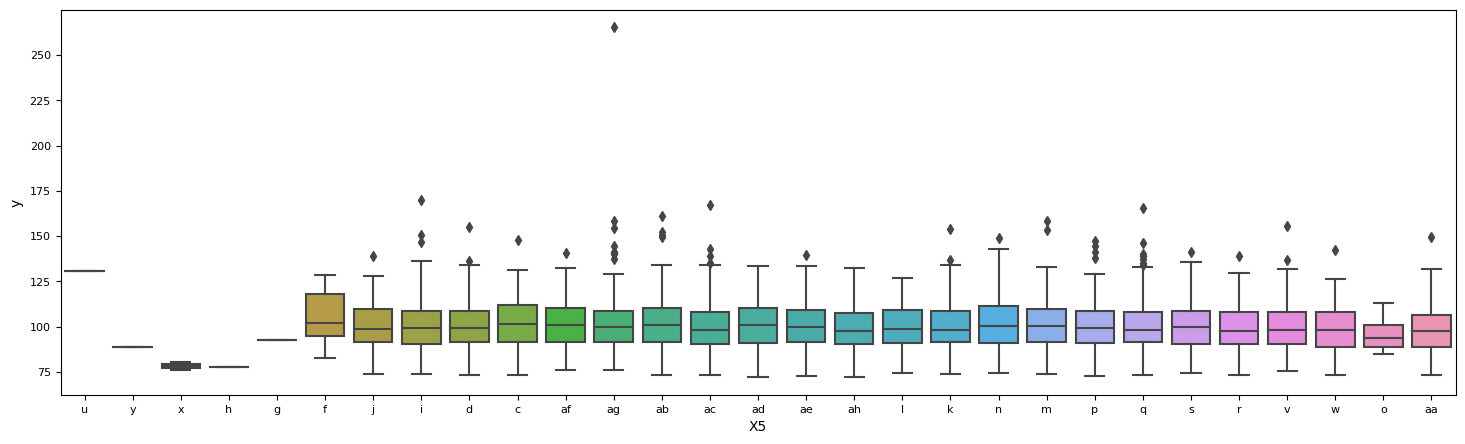

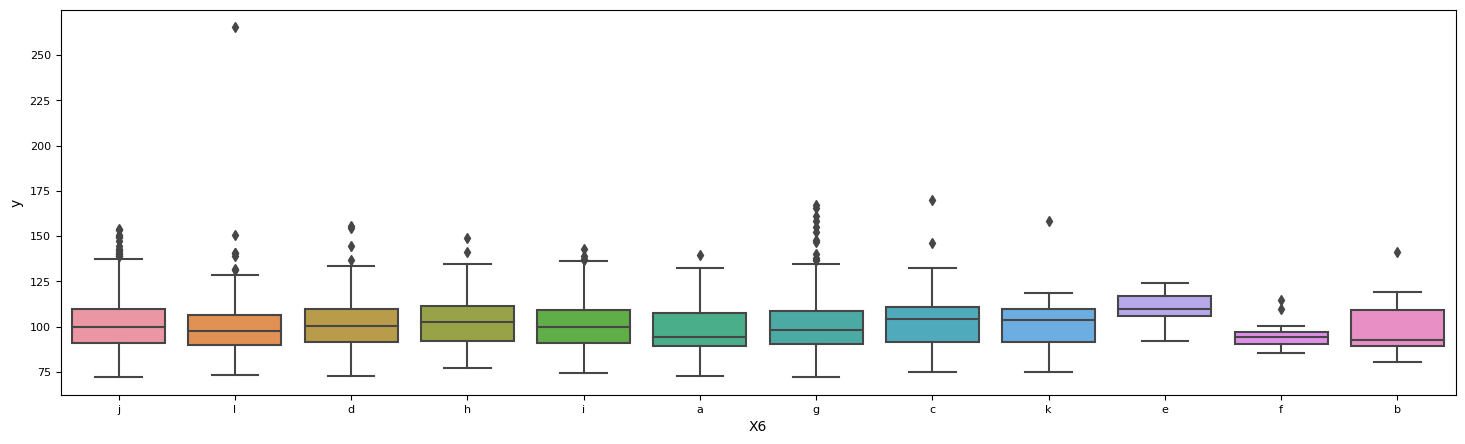

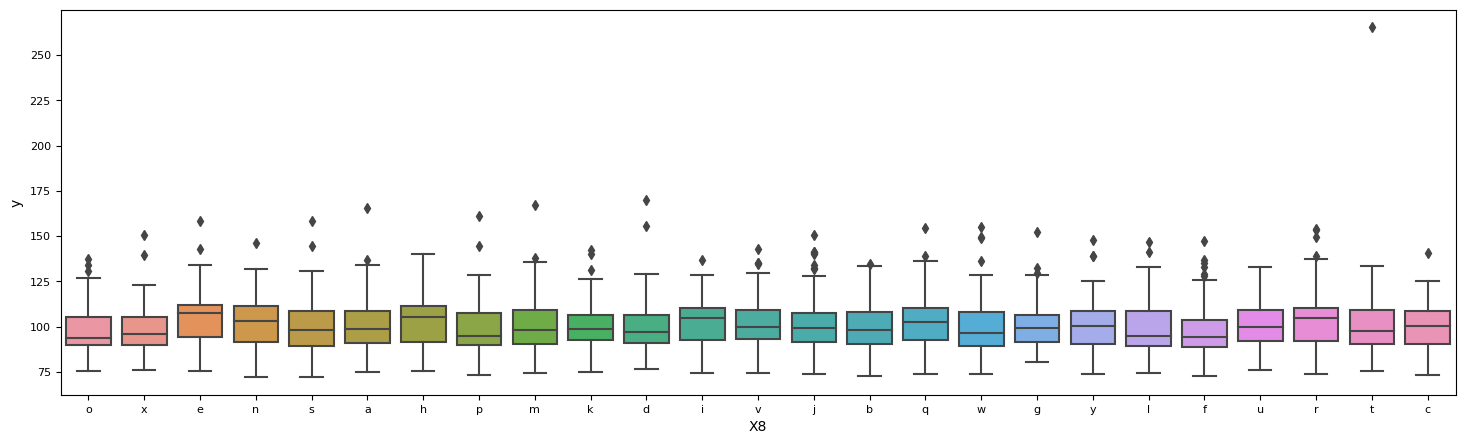

In [201]:
# illustrations in boxplots from seaborn for more insight

# value of y change for each of X0, X1...
cols=['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cols:
    plt.figure(figsize=(18, 5))
    
    sns.boxplot(x=col, y='y', data=df_train)
    
    plt.xlabel(col, fontsize=10)
    plt.ylabel('y', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
#X4 doesn't seem to have much variation



In [202]:
df_train.drop(columns=['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347'])

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [203]:
df_test.drop(columns=['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347'])

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [204]:
# Declaring X and y variables for model fitting and dropping 'y'
X = df_train.drop(['y'], axis=1)
y = df_train.y



In [205]:
# some reason here y is still not a 1-d array

y = y.drop(columns=['ID'])
y.info()
y.head()


<class 'pandas.core.series.Series'>
RangeIndex: 4209 entries, 0 to 4208
Series name: y
Non-Null Count  Dtype  
--------------  -----  
4209 non-null   float64
dtypes: float64(1)
memory usage: 33.0 KB


0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [206]:
# Shape of X, y variables

X.shape


(4209, 377)

In [207]:
df_test.shape

(4209, 377)

In [208]:
y.shape

(4209,)

In [209]:
## assume predict y column using others, get rid or separate ID's and any other column (column 11). Looks like some rows
## NaN filled

## Focusing on first part of train data, 'mer_train.csv'
## y column is predicted value

## LabelEncoder use on X(label encoder)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# X = le.fit_transform(X)
# y = le.fit_transform(y)
X['X0'] = le.fit_transform(X['X0'])
X['X1'] = le.fit_transform(X['X1'])
X['X2'] = le.fit_transform(X['X2'])
X['X3'] = le.fit_transform(X['X3'])
X['X4'] = le.fit_transform(X['X4'])
X['X5'] = le.fit_transform(X['X5'])
X['X6'] = le.fit_transform(X['X6'])
X['X8'] = le.fit_transform(X['X8'])

y = DataFrame(y)
## how to iterate through a vew columns?


In [244]:
## LabelEncoder use on X(label encoder)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# X = le.fit_transform(X)
y = le.fit_transform(y)
df_test['X0'] = le.fit_transform(df_test['X0'])
df_test['X1'] = le.fit_transform(df_test['X1'])
df_test['X2'] = le.fit_transform(df_test['X2'])
df_test['X3'] = le.fit_transform(df_test['X3'])
df_test['X4'] = le.fit_transform(df_test['X4'])
df_test['X5'] = le.fit_transform(df_test['X5'])
df_test['X6'] = le.fit_transform(df_test['X6'])
df_test['X8'] = le.fit_transform(df_test['X8'])


/Users/User/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [245]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [246]:
X.head()


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
## apply after label encoder, dimensional reduction techniques
## dataframe from 'mer_train.csv' only

from sklearn.model_selection import train_test_split

# For the larger the dataset, the smaller the test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test size 20% 

In [248]:
# import libraries for metrics and reporting
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve


def model_metrics(y_true, y_hypothesis, test='test data'): 
    print("metrics using {} ...".format(test))
    print('Mean Abs Error   MAE    : ', mean_absolute_error(y_true, y_hypothesis))
    print('Mean Sq  Error MSE      : ', mean_squared_error(y_true, y_hypothesis))
    print('Root Mean Sq Error RMSE : ', np.sqrt(mean_squared_error(y_true, y_hypothesis)))
    print('MAPE                    : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    print('MPE                     : ', np.mean((y_true - y_pred) / y_true) * 100)
    print('r2 value                : ', r2_score(y_true, y_hypothesis))

    print('\n')



In [249]:
# Creating secondary small batch training on df_train, need to wrangle df_test after findings
# Quick linear regression model
from sklearn.linear_model import LinearRegression

#instantiate the lin reg model
linreg = LinearRegression()

#fit the data
linreg.fit (X_train, y_train)


#predict (training samples)
y_pred = linreg.predict(X_train)
model_metrics(y_train, y_pred, 'training data')

#predict (testing samples)
y_pred = linreg.predict(X_test)
model_metrics(y_test, y_pred, 'test data')

metrics using training data ...
Mean Abs Error   MAE    :  290.5517001954349
Mean Sq  Error MSE      :  156784.4863949453
Root Mean Sq Error RMSE :  395.96020809539095
MAPE                    :  inf
MPE                     :  -inf
r2 value                :  0.6738864679375224


metrics using test data ...
Mean Abs Error   MAE    :  313.2121119805296
Mean Sq  Error MSE      :  175983.00983711786
Root Mean Sq Error RMSE :  419.50328942347744
MAPE                    :  53.07661867550375
MPE                     :  -22.096181471367444
r2 value                :  0.6374005134273346




/var/folders/dz/fcqhd41j7931fpxc4944p2dw0000gn/T/ipykernel_600/350139550.py:13: RuntimeWarning: divide by zero encountered in divide
  print('MAPE                    : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
/var/folders/dz/fcqhd41j7931fpxc4944p2dw0000gn/T/ipykernel_600/350139550.py:14: RuntimeWarning: divide by zero encountered in divide
  print('MPE                     : ', np.mean((y_true - y_pred) / y_true) * 100)


In [250]:
y_test.shape

(842,)

In [251]:
# 62% R squared not a good fit.
# Run cross validation metrics

# folds Model


#import libraries for model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kf = KFold(n_splits=11, shuffle=True, random_state=20)

%time
scoring = {'r2':'r2',
           'MSE': 'neg_mean_squared_error'}

#instantiate the lin reg model
linreg = LinearRegression()

scores = cross_validate(estimator=linreg,
                        X=X_train,
                        y=y_train,
                        cv=kf,
                        scoring=scoring,
                        return_train_score=True)

#print('Score keys : \n', scores.keys())

print('Training r2 : {}'.format(scores['train_r2'].mean()))
print('Testing r2 : {}'.format(scores['test_r2'].mean()))
print('Training MSE: {}'.format(scores['train_MSE'].mean()))
print('Testing MSE: {}'.format(scores['test_MSE'].mean()))

#High dimensionality
#Multi-collinearity

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
Training r2 : 0.6760823611918673
Testing r2 : 0.608805888597105
Training MSE: -155722.5302663065
Testing MSE: -187292.71550391192


In [252]:
## Dimensional red. here with PCA down to 13 

# Use n_components < 1 for explained variance sum and n_components > 1 for specific number of components to keep
# Besides PCA you can also try LDA, tSNE, IsoMap, etc.

# Dim Red. - Feature scaling and apply to both test and train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# sc_t = StandardScaler()

# Fit on training set only.
sc.fit(X_train) # Apply transform to both the training set and the test set.
# sc_t.fit(y_test)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
df_test_sc = sc.transform(df_test)
# y_train_sc = sc_t.transform(y_train)
# y_test_sc = sc_t.transform(y_test)

## (Wrapper not working) dim_red = SklearnTransformerWrapper(transformer = PCA(n_components=0.95))

from sklearn.decomposition import PCA
# Make an instance of the Model, 90% variance allowed
pca = PCA(0.90)
# pca_t = PCA(0.97)

pca.fit(X_train_sc)
# pca_t.fit(X_test_sc)

X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
df_test_pca = sc.transform(df_test_sc)
# y_train_pca = pca.transform(y_train_sc)
# y_test_pca = pca_t.transform(y_test_sc)

# Opted not for PCA but will see after score



/Users/User/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [253]:
print(X_train_pca)

# check for number of components to hyperparameter 0.95
pca.n_components_



[[-0.47588732  0.14725456  2.80043757 ...  1.44318449 -0.09396168
   0.27014992]
 [ 2.51131239 -0.14920819  3.75709584 ...  0.18148311  1.28082967
   0.23111028]
 [-1.30474415 -0.67634552 -1.97533408 ... -0.38712771  0.25167786
  -0.39365139]
 ...
 [-1.62878872 -0.50145207 -1.1994543  ...  0.7399     -1.09541009
  -1.83388082]
 [-2.54486991 -0.35003073  0.01018264 ... -0.69404842  0.98777247
  -0.73050347]
 [-1.46777997 -2.15301834 -3.83428326 ...  0.61600784 -0.35652726
   0.60259794]]


118

In [254]:
X_train_pca.shape

(3367, 118)

In [255]:
y_train.shape

(3367,)

In [256]:
# Using DMatrix instead of dataframe
# GridSearchCV to optimize hyperparameters XGB
from sklearn.model_selection import GridSearchCV

# MSE data from transformed X data
#predict (training samples)
from sklearn.linear_model import LinearRegression
lireg = LinearRegression()
#fit the data
linreg.fit (X_train_pca, y_train)

y_pred = linreg.predict(X_train_pca)
model_metrics(y_train, y_pred, 'training data')


metrics using training data ...
Mean Abs Error   MAE    :  311.9023182259809
Mean Sq  Error MSE      :  175327.94552484064
Root Mean Sq Error RMSE :  418.7217996771134
MAPE                    :  inf
MPE                     :  -inf
r2 value                :  0.635315860012239




/var/folders/dz/fcqhd41j7931fpxc4944p2dw0000gn/T/ipykernel_600/350139550.py:13: RuntimeWarning: divide by zero encountered in divide
  print('MAPE                    : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
/var/folders/dz/fcqhd41j7931fpxc4944p2dw0000gn/T/ipykernel_600/350139550.py:14: RuntimeWarning: divide by zero encountered in divide
  print('MPE                     : ', np.mean((y_true - y_pred) / y_true) * 100)


In [257]:
y_pred.shape

(3367,)

In [258]:
#predict (testing samples)
y_pred = linreg.predict(X_test_pca)
model_metrics(y_test, y_pred, 'test data')
# convert the array back to a dataframe
# from pandas import DataFrame
# X_train_pca = DataFrame(X_train_pca)
# X_test_pca = DataFrame(X_train_pca)
# y_train = DataFrame(y_train)
# y_test = DataFrame(y_test)

metrics using test data ...
Mean Abs Error   MAE    :  320.47894956450426
Mean Sq  Error MSE      :  180394.81742109798
Root Mean Sq Error RMSE :  424.72911063535304
MAPE                    :  57.00403921415088
MPE                     :  -34.22922200316129
r2 value                :  0.6283103224691893




In [259]:
mean_squared_error(y_pred, y_test)

180394.81742109798

In [260]:
# adding GridSearch hyperparameter optimization
# using n_components from pca.n_components_

In [261]:
%%time
# XGBoost Model
# pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [118,234,333], 'learning_rate': [0.13,0.26,0.29], 'max_depth': [1,2,3]}
grid_xgb = GridSearchCV(xgb.XGBRegressor(), param_grid = grid_values, cv=10, scoring = 'r2')
grid_xgb.fit(X_train_pca, y_train)




CPU times: user 43min 38s, sys: 17.5 s, total: 43min 55s
Wall time: 12min 47s


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.13, 0.26, 0.29],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [118, 234, 333]},
             scoring='r2')

In [262]:
print('Mean score matrix: ', grid_xgb.cv_results_['mean_test_score'])
print('Grid best parameter (max. accuracy): ', grid_xgb.best_params_)
print('Grid best score (accuracy): ', grid_xgb.best_score_)



Mean score matrix:  [0.48032065 0.54663221 0.56482545 0.56681919 0.57914272 0.57779891
 0.57648933 0.57021495 0.56427223 0.5494782  0.57355847 0.57717144
 0.56852282 0.55805544 0.5485917  0.55621168 0.53835093 0.52987191
 0.55574507 0.57509379 0.57819515 0.57153947 0.55902618 0.5497502
 0.55039288 0.52560539 0.51484685]
Grid best parameter (max. accuracy):  {'learning_rate': 0.13, 'max_depth': 2, 'n_estimators': 234}
Grid best score (accuracy):  0.579142723273488


In [263]:
y_pred = grid_xgb.predict(X_test_pca)


In [269]:
y_pred = DataFrame(y_pred)
y_test = DataFrame(y_test)

In [270]:
y_pred.head(6)

,0
0,695.970398
1,1203.741821
2,1396.135864
3,215.289246
4,1484.769775
5,1140.215332


In [271]:
y_pred.shape

(842, 1)

In [272]:
y_test.shape

(842, 1)

In [273]:
y_test.head(6)

,0
0,1079
1,985
2,1550
3,122
4,1758
5,878


In [274]:
model_metrics(y_test, y_pred, 'test data')

metrics using test data ...
Mean Abs Error   MAE    :  347.4665474019538
Mean Sq  Error MSE      :  210999.62482751656
Root Mean Sq Error RMSE :  459.3469547384815
MAPE                    :  0    64.572501
dtype: float64
MPE                     :  0   -44.038945
dtype: float64
r2 value                :  0.5652514654664943




/Users/User/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [276]:

# Creating DMatrices for Xgboost training
dtrain = xgb.DMatrix(X_train_pca, label=y_train)
dtest  = xgb.DMatrix(X_test_pca,  label=y_test)
dtest_submit = xgb.DMatrix(df_test_pca, label=None)

# Parameter dictionary
# Prepare dict of params for xgboost model.
# reg_alpha - L1
# reg_lambda - L2
xgb_params = {
    'max_depth':13,
    'min_child_weight': 1,
    'eta':.26,                        # learning_rate, 0-1
    'subsample': 1,                   # randomly sample the training data 
    'colsample_bytree': .5,
    'objective':'reg:squarederror',
    'reg_alpha': 31,                 # was 4.1 increasing slowly to 30
    'reg_lambda': .0001,
    'eval_metric': 'mae',
    'validate_parameters': 1,
    'verbose_eval': True,
    'verbosity': 0                    # 0- silent, 1-warning, 2-info, 3-debug
}


In [277]:
%%time
model_xgb = xgb.train(
                xgb_params,
                dtrain,
                num_boost_round = 999,
                evals           = [(dtest, "Test")],
                early_stopping_rounds=9, 
)



[0]	Test-mae:891.82759
[1]	Test-mae:687.28924
[2]	Test-mae:565.06410
[3]	Test-mae:485.22972
[4]	Test-mae:435.25424
[5]	Test-mae:410.74906
[6]	Test-mae:399.31029
[7]	Test-mae:396.07336
[8]	Test-mae:394.51002
[9]	Test-mae:395.44476
[10]	Test-mae:396.00373
[11]	Test-mae:398.64924
[12]	Test-mae:399.52684
[13]	Test-mae:400.72384
[14]	Test-mae:401.29230
[15]	Test-mae:402.22601
[16]	Test-mae:403.46778
CPU times: user 2.94 s, sys: 61.1 ms, total: 3 s
Wall time: 909 ms


In [278]:
# Predictions and Metrics
y_train = DataFrame(y_train)
y_pred = model_xgb.predict(dtrain)


#from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_pred = le.fit_transform(y_pred)
# y_test = le.fit_transform(y_test)
# y_train = le.fit_transform(y_train)

# Predict
y_pred = model_xgb.predict(dtrain)
y_pred = DataFrame(y_pred)
model_metrics(y_train, y_pred, 'training data')




metrics using training data ...
Mean Abs Error   MAE    :  24.85429576868681
Mean Sq  Error MSE      :  1159.9348730800648
Root Mean Sq Error RMSE :  34.05781662232717
MAPE                    :  0    inf
dtype: float64
MPE                     :  0   -inf
dtype: float64
r2 value                :  0.9975873221444262




/Users/User/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [279]:
# 99% R squared value on training data

In [280]:
y_pred = model_xgb.predict(dtest)
y_pred = DataFrame(y_pred)
y_pred.shape



(842, 1)

In [281]:
y_test = DataFrame(y_test)
y_test.shape

(842, 1)

In [282]:
model_metrics(y_test, y_pred, 'test data')
# y_test.info()
# y_test.head()
# y_test.shape

metrics using test data ...
Mean Abs Error   MAE    :  404.28008020858584
Mean Sq  Error MSE      :  285369.51622766466
Root Mean Sq Error RMSE :  534.1998841516765
MAPE                    :  0    65.012281
dtype: float64
MPE                     :  0   -40.389582
dtype: float64
r2 value                :  0.41201801149205897




/Users/User/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [285]:
df_test_pca.shape


(4209, 377)

In [286]:
X_test_pca.shape

(842, 118)

In [ ]:
# need to train whole X or df_train -> sc.fit_transform -> pca.fit_transform -> DMatrix -> model_xgb

In [196]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [197]:
# error for y_train
# y_train = df.to_numpy()
## PCA not good at 0.97 , trying at 0.90

In [198]:
## error from first pass y_train
## That happens because the class column has to start from 0 
## (as required since version 1.3.2). An easy way to solve that 
## is using LabelEncoder from sklearn.preprocssing library.

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train_pca = le.fit_transform(y_train_pca)
# y_train_pca = le.fit_transform(y_train_pca)


# clean up errors in y_train or maybe X_train_sc, error message says a "<" was found
# model = XGBClassifier()
# import xgboost as xgb
# model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)
# model.fit(X_train_pca, y_train)

In [199]:
# make predictions for test data
# y_pred = model.predict(X_test_pca)

# predictions = [round(value) for value in y_pred]


# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# predictions = le.fit_transform(predictions)
# y_test = le.fit_transform(y_test)


In [200]:
# predictions = DataFrame(predictions)
# predictions.info()
# predictions.head()


In [201]:
# y_test = DataFrame(y_test)
# y_test.info()
# y_test.head()

In [202]:
# !pip install pandoc
# evaluate predictions
# true_y = y_test.iloc[1]
# pred_y = predictions.iloc[1]
# accuracy = accuracy_score(y_test,predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print((accuracy * 100.0))

In [203]:
# !pip install nbconvert
# !pip install --upgrade pip